In [1]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [2]:
#loading the data set
data=pd.read_csv('feedback.csv')
data.head()
np.bincount(data['Target'])
#print (data.loc[[21787]])

#data.astype({'Target': 'int32'})

array([12500, 12500])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Target     25000 non-null  int64 
 1    feedback  25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
#splitting the positive and negative reviews for analysis
pos,neg=data[data['Target']==0],data[data['Target']==1]
#len(pos),len(neg)
s1=set(pos)
s2=set(neg)
s1.union(s2)
s3=set(data['Target'])
s3.difference(s1)

{0, 1}

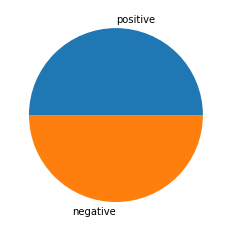

In [5]:
#analyse the ratio of positive to negative
plt.pie([len(pos),len(neg)],labels=['positive','negative'])
plt.show()

## Data Cleaning

In [6]:
#to check for null values
data.isnull().sum()

Target       0
 feedback    0
dtype: int64

## Text Preprocessing

In [7]:
#to remove punctuations
import re
def cleaning(text):
    nonalphanum=re.compile(r'[\W]')
    punctuation=re.compile(r'[^a-z]')
    l=[]
    for i in text:
        lower=i.lower()
        Npunct=nonalphanum.sub(r' ',lower)
        x=punctuation.sub(r' ',Npunct)
        l.append(x)
    return l
data[' feedback']=cleaning(data[' feedback'])
data.head(10)

,Target,feedback
0,1,with all this stuff going down at the moment w...
1,1,the classic war of the worlds by timothy hin...
2,0,the film starts with a manager nicholas bell ...
3,0,it must be assumed that those who praised this...
4,1,superbly trashy and wondrously unpretentious ...
5,1,i dont know why people think this is such a ba...
6,0,this movie could have been very good but come...
7,0,i watched this video at a friend s house i m ...
8,0,a friend of mine bought this film for and ...
9,1,this movie is full of references like mad ...


In [8]:
#to remove stop_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#data[' feedback'].apply(lambda x:[i for i in x if word_tokenize(i) not in stopwords.words('english')])
def remove_stopwords(text):
    l=[]
    sw=set(stopwords.words('english'))
    for i in text:
        s=""
        x=word_tokenize(i)
        s=[word for word in x if not word in sw]
        l.append(' '.join(s))
    return l;
#text=["How are you doing in 2021?","Hi! my name is Resham Chaney."]
#remove_stopwords(cleaning(text))
#df=data[:20000]

data[' feedback']=remove_stopwords(data[' feedback'])
#data.head(10)
data.head(10)

,Target,feedback
0,1,stuff going moment mj started listening music ...
1,1,classic war worlds timothy hines entertaining ...
2,0,film starts manager nicholas bell giving welco...
3,0,must assumed praised film greatest filmed oper...
4,1,superbly trashy wondrously unpretentious explo...
5,1,dont know people think bad movie got pretty go...
6,0,movie could good comes way short cheesy specia...
7,0,watched video friend house glad waste money bu...
8,0,friend mine bought film even grossly overprice...
9,1,movie full references like mad max ii wild one...


## Vectorization

In [9]:
#testing an example to explore how count vectorizer works
from sklearn.feature_extraction.text import CountVectorizer

text=["How are you doing in 2021?","Hi! my name is Resham Chaney."]

vectorizer = CountVectorizer()   
vectorizer.fit(text) 

#printing the unique words
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document 
vector = vectorizer.transform(text) 

print(vector)
print(vector.toarray())

Vocabulary:  {'how': 5, 'are': 1, 'you': 11, 'doing': 3, 'in': 6, '2021': 0, 'hi': 4, 'my': 8, 'name': 9, 'is': 7, 'resham': 10, 'chaney': 2}
  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 5)	1
  (0, 6)	1
  (0, 11)	1
  (1, 2)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 10)	1
[[1 1 0 1 0 1 1 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 1 1 1 0]]


In [10]:
#splitting the training and testing data 7:3 ratio
from sklearn.model_selection import train_test_split

x=data[' feedback']
y=data['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#shape of the split data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17500,), (17500,), (7500,), (7500,))

In [11]:
#vectorizing the actual data
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

#fit the data because it is the training data and then encode
cv.fit(x_train)
x_train=cv.transform(x_train)

#do not fit the data becuase it has to be tested so just transformed
x_test=cv.transform(x_test)

x_train.shape, x_test.shape

((17500, 63464), (7500, 63464))

In [12]:
#list of some feature names 
features=cv.get_feature_names()
features[51000:51010]

['singaporean',
 'singe',
 'singer',
 'singers',
 'singh',
 'singhs',
 'singin',
 'singing',
 'single',
 'singled']

In [13]:
len(cv.vocabulary_)

63464

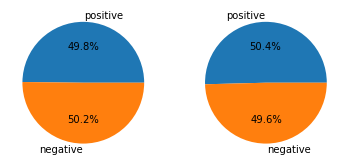

In [14]:
#Analysing train and test data
a=np.bincount(y_train)
b=np.bincount(y_test)
#y_train, y_test

fig, axs = plt.subplots(1, 2)
axs[0].pie(a,labels=['positive','negative'],autopct='%1.1f%%')
axs[1].pie(b,labels=['positive','negative'],autopct='%1.1f%%')
plt.show()

## Modelling and Evaluation

### SVM

In [29]:
#training the SVM model
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)

SVC()

In [31]:
#testing the model
prediction= model.predict(x_test)

#accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8769333333333333

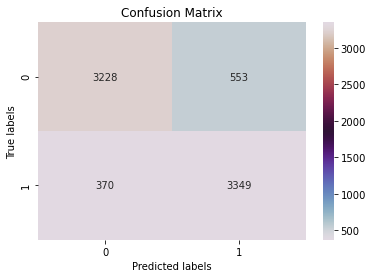

In [54]:
#to find out the misckassified samples with the help of confusion matrix
from sklearn.metrics import confusion_matrix
x=confusion_matrix(y_test,prediction)

import seaborn as sns   

ax= plt.subplot()
sns.heatmap(x,annot=True,ax=ax,fmt='g',cmap='twilight'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test,prediction)

0.8788872851331847

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3781
           1       0.86      0.90      0.88      3719

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



### Random Forest

In [33]:
#training the Random Forest model
from sklearn.ensemble.forest import RandomForestClassifier

model2=RandomForestClassifier(n_jobs=2,random_state=0)
#X_train.todense()
model2.fit(x_train,y_train)
#model2.fit(x_train.toarray(),y_train.toarray())

RandomForestClassifier(n_jobs=2, random_state=0)

In [34]:
#testing the model
prediction2= model2.predict(x_test)

In [35]:
#accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction2)

0.8556

In [37]:
#f1_score check
from sklearn.metrics import f1_score
f1_score(y_test,prediction2)

0.854259184497376

In [39]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3781
           1       0.86      0.85      0.85      3719

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



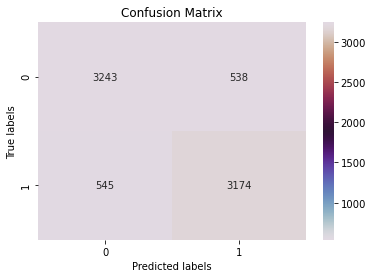

In [40]:
#to find out the misckassified samples with the help of confusion matrix
from sklearn.metrics import confusion_matrix
x=confusion_matrix(y_test,prediction2)

import seaborn as sns   

ax= plt.subplot()
sns.heatmap(x,annot=True,ax=ax,fmt='g',cmap='twilight'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### Multi Layer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(500, 200,50), random_state=1)
clf.fit(x_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(500, 200, 50), random_state=1,
              solver='lbfgs')

In [16]:
#testing the model
prediction3= clf.predict(x_test)

In [17]:
#accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction3)

0.8746666666666667

In [18]:
#f1_score check
from sklearn.metrics import f1_score
f1_score(y_test,prediction3)

0.8737577222669889

In [19]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3781
           1       0.87      0.87      0.87      3719

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500



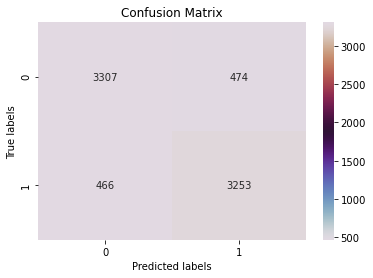

In [20]:
#to find out the misckassified samples with the help of confusion matrix
from sklearn.metrics import confusion_matrix
x=confusion_matrix(y_test,prediction3)

import seaborn as sns   

ax= plt.subplot()
sns.heatmap(x,annot=True,ax=ax,fmt='g',cmap='twilight'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 